<b>environment:</b> deg_env, python=3.9.7

In [12]:
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

from sklearn.decomposition import PCA
import scanpy as sc

from filter_adata import adata_filtered, adata_hightumour, adata_peritumour
from differential_expression import run_DEG_wilcoxon

In [ ]:
# rename long gene sets
global_short_names = {
    # KEGG
    "KEGG_MELANOMA.v2025.1.Hs.gmt__KEGG_MELANOMA": "Melanoma Pathway",

    # Hallmark
    "MSigDB_Hallmark_2020__Interferon Alpha Response": "IFN-α Response",
    "MSigDB_Hallmark_2020__Interferon Gamma Response": "IFN-γ Response",
    "MSigDB_Hallmark_2020__Apoptosis": "Apoptosis",
    "MSigDB_Hallmark_2020__p53 Pathway": "p53 Pathway",
    "MSigDB_Hallmark_2020__TNF-alpha Signaling via NF-kB": "TNFα/NF-κB Signalling",
    "MSigDB_Hallmark_2020__KRAS Signaling Up": "KRAS Signalling (Up)",
    "MSigDB_Hallmark_2020__Complement": "Complement",
    "MSigDB_Hallmark_2020__Estrogen Response Late": "Estrogen Response (Late)",
    "MSigDB_Hallmark_2020__G2-M Checkpoint": "G2/M Checkpoint",
    "MSigDB_Hallmark_2020__IL-2/STAT5 Signaling": "IL-2/STAT5 Signalling",
    "MSigDB_Hallmark_2020__IL-6/JAK/STAT3 Signaling": "IL-6/JAK/STAT3 Signalling",
    "MSigDB_Hallmark_2020__Epithelial Mesenchymal Transition": "EMT",
    "MSigDB_Hallmark_2020__Allograft Rejection": "Allograft Rejection",
    "MSigDB_Hallmark_2020__Glycolysis": "Glycolysis",
    "MSigDB_Hallmark_2020__Inflammatory Response": "Inflammatory Response",
    "MSigDB_Hallmark_2020__PI3K/AKT/mTOR  Signaling": "PI3K/AKT/mTOR Signalling",

    # Oncogenic signatures
    "MSigDB_Oncogenic_Signatures__SNF5 DN.V1 UP": "SNF5 Loss (Up)",
    "MSigDB_Oncogenic_Signatures__IL15 UP.V1 UP": "IL15 (Up)",
    "MSigDB_Oncogenic_Signatures__EGFR UP.V1 UP": "EGFR (Up)",
    "MSigDB_Oncogenic_Signatures__HOXA9 DN.V1 UP": "HOXA9 Loss (Up)",
    "MSigDB_Oncogenic_Signatures__LTE2 UP.V1 DN": "LTE2 (Down)",
    "MSigDB_Oncogenic_Signatures__MEL18 DN.V1 UP": "MEL18 Loss (Up)",
    "MSigDB_Oncogenic_Signatures__WNT UP.V1 UP": "WNT (Up)",
    "MSigDB_Oncogenic_Signatures__KRAS.600.LUNG.BREAST UP.V1 UP": "KRAS 600 (Lung/Breast, Up)",
    "MSigDB_Oncogenic_Signatures__KRAS.600 UP.V1 UP": "KRAS 600 (Up)",
    "MSigDB_Oncogenic_Signatures__KRAS.LUNG UP.V1 UP": "KRAS (Lung, Up)",
    "MSigDB_Oncogenic_Signatures__KRAS.LUNG.BREAST UP.V1 UP": "KRAS (Lung/Breast, Up)",
    "MSigDB_Oncogenic_Signatures__ALK DN.V1 UP": "ALK Loss (Down)",
    "MSigDB_Oncogenic_Signatures__BMI1 DN.V1 UP": "BMI1 Loss (Up)",
    "MSigDB_Oncogenic_Signatures__P53 DN.V1 DN": "p53 Loss (Down)",
    "MSigDB_Oncogenic_Signatures__P53 DN.V2 UP": "p53 Loss (Up)",
    "MSigDB_Oncogenic_Signatures__STK33 UP": "STK33 (Up)",
    "MSigDB_Oncogenic_Signatures__VEGF A UP.V1 UP": "VEGFA (Up)",
    "MSigDB_Oncogenic_Signatures__LEF1 UP.V1 UP": "LEF1 (Up)",
    "MSigDB_Oncogenic_Signatures__STK33 SKM UP": "STK33 (SKM, Up)",
    "MSigDB_Oncogenic_Signatures__E2F1 UP.V1 DN": "E2F1 (Down)",
    "MSigDB_Oncogenic_Signatures__RPS14 DN.V1 UP": "RPS14 Loss (Up)",
    "MSigDB_Oncogenic_Signatures__CYCLIN D1 KE .V1 DN": "Cyclin D1 Loss (Down)",
    "MSigDB_Oncogenic_Signatures__NFE2L2.V2": "NFE2L2",
    "MSigDB_Oncogenic_Signatures__STK33 NOMO UP": "STK33 (NOMO, Up)",
    "MSigDB_Oncogenic_Signatures__IL2 UP.V1 UP": "IL2 (Up)"
}

pre.res2d['ShortName'] = pre.res2d['Term'].map(global_short_names).fillna(pre.res2d['Term'])    # map onto pre for plotting

<h1><b>Global Analysis

In [3]:
global_DEG = run_DEG_wilcoxon(
    adata=adata_filtered,
    response_col='Response',
    celltype_col='specific_cell_types'
)

Running DEG on each cell type...
Wilcoxon rank-sum test successful for Proliferating Melanoma!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Granulocyte!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Epithelial!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Inflammatory CAF!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Endothelial!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for CD8 T!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for M2 TAM!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Classical CAF!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Plasmablast!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Dendritic!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for M1 TAM!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for CD4 T!

/opt/anaconda3/envs/deg_env/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


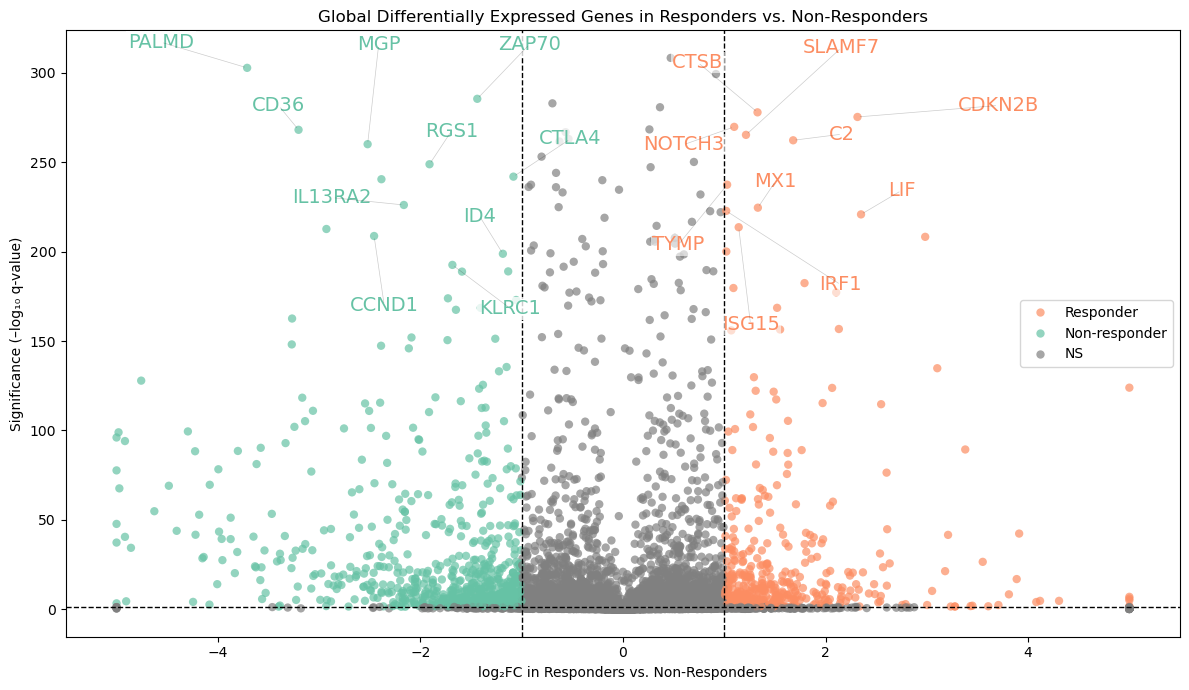

In [4]:
# first, extract q-values and lfc from dataframe:
df = global_DEG.copy()

# set thresholds
q_max = 0.05            # q-value < 0.05
lfc_min = 1             # lfc < 1

df['-log10(qval)'] = -np.log10(df['qval'])  # -log10(q) so a smaller (more significant) q-values have points higher on the y-axis

def label(row):
    if row['qval'] < q_max and row['log2fc'] > lfc_min:
        return 'Responder'
    elif row['qval'] < q_max and row['log2fc'] < -lfc_min:
        return 'Non-responder'
    else:
        return 'NS'
df['enriched_in'] = df.apply(label, axis=1)

lfc_cap = 5  # cap log2FC between -5 and 5
df["log2fc_capped"] = df["log2fc"].clip(-lfc_cap, lfc_cap)

# volcano plot
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=df, x="log2fc_capped", y="-log10(qval)",
    hue="enriched_in", hue_order=["Responder", "Non-responder", "NS"],
    palette={"Responder":"#fc8d62", "Non-responder":"#66c2a5", "NS":"grey"},
    alpha=0.7, edgecolor="none"
)

# threshold lines
plt.axhline(-np.log10(q_max), color="black", linestyle="--", linewidth=1)
plt.axvline(lfc_min, color="black", linestyle="--", linewidth=1)
plt.axvline(-lfc_min, color="black", linestyle="--", linewidth=1)

# pull top 10 significant genes in responders and non-responders
top_responder = df[
    (df['enriched_in'] == "Responder") & df['-log10(qval)']
    .replace([np.inf, -np.inf], np.nan).notna()].sort_values("qval").drop_duplicates("gene").head(10)
top_nonresponder = df[
    (df['enriched_in'] == "Non-responder") & df['-log10(qval)']
    .replace([np.inf, -np.inf], np.nan).notna()].sort_values("qval").drop_duplicates("gene").head(10)

# add gene labels to top 10 significant genes
texts = []
texts.extend(
    plt.text(
        row["log2fc_capped"],
        row["-log10(qval)"],
        row["gene"],
        fontsize=14,
        color="#fc8d62",  # same color as responders
        ha='left', va='baseline',
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=1)
    )
    for _, row in top_responder.iterrows()
)
texts.extend(
    plt.text(
        row["log2fc_capped"],
        row["-log10(qval)"],
        row["gene"],
        fontsize=14,
        color="#66c2a5",  # same color as non-responders
        ha='right', va='baseline',
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="none", pad=1.5)
    )
    for _, row in top_nonresponder.iterrows()
)
# adjust labels to avoid overlaps
adjust_text(texts, 
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5, alpha=0.2),
            force_points=3.5, expand=(1.5, 3.5))

plt.xlabel("log₂FC in Responders vs. Non-Responders")
plt.ylabel("Significance (–log₁₀ q-value)")
plt.title("Global Differentially Expressed Genes in Responders vs. Non-Responders")
plt.legend()
plt.tight_layout()
plt.show()

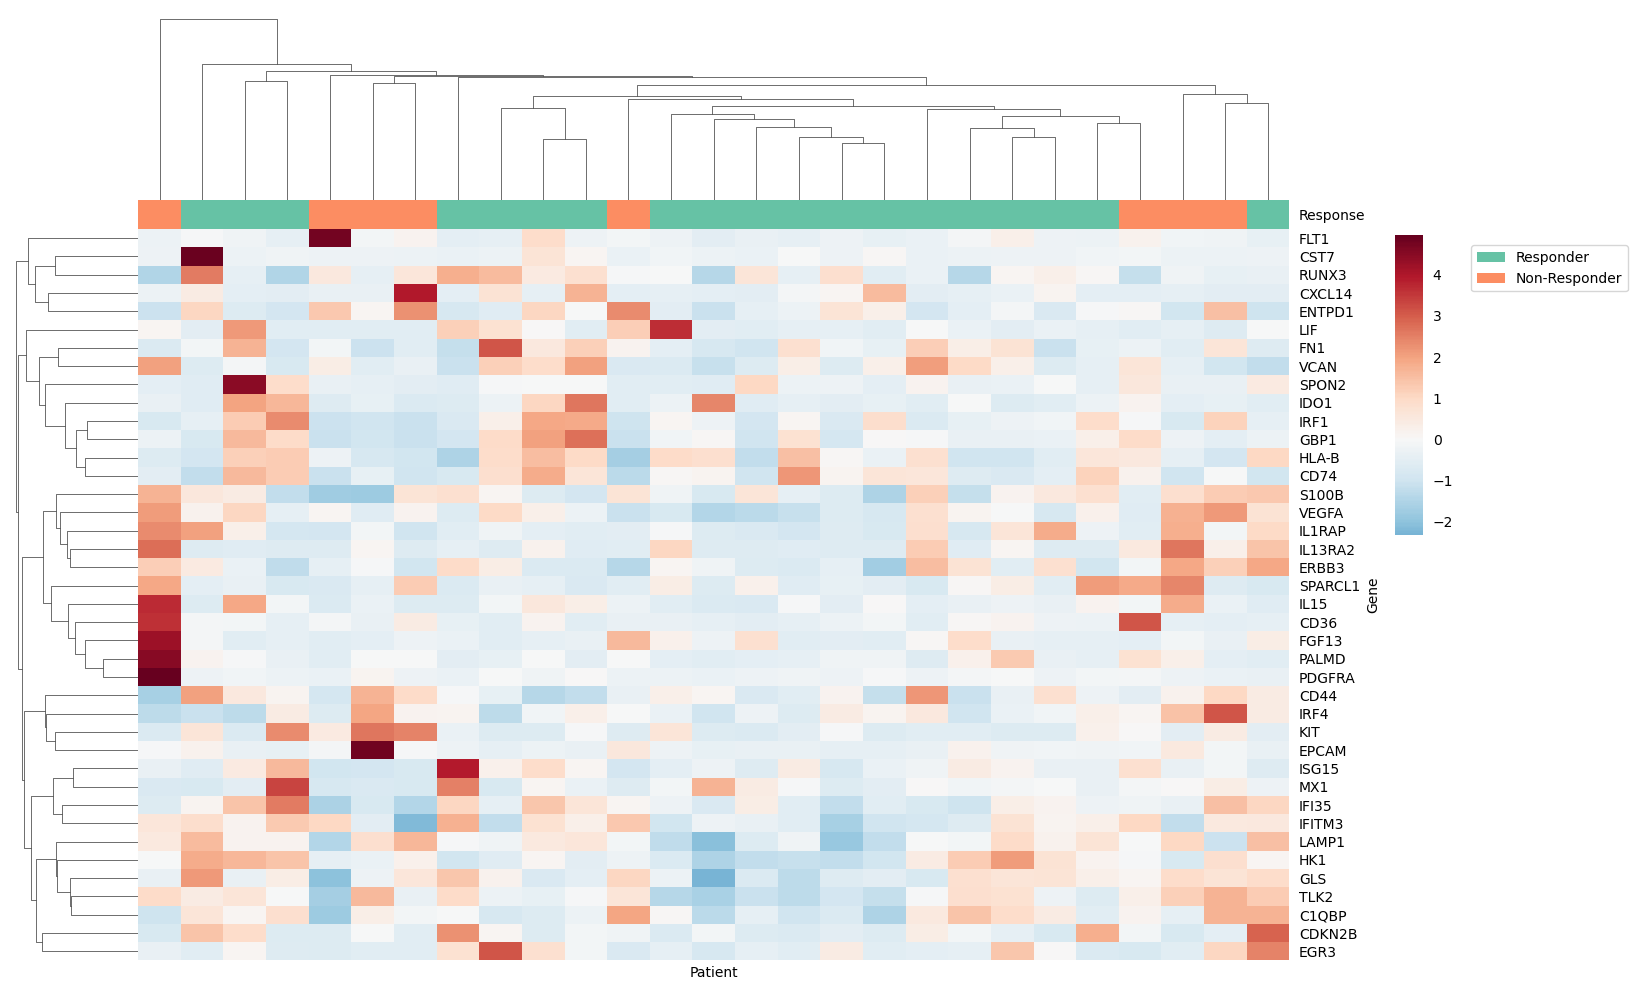

In [11]:
# top 40 genes by q-value (adjusted p-val)
global_top_genes = global_DEG.sort_values("qval").drop_duplicates("gene").head(40)["gene"]

# subset expression data (genes × samples)
exp_matrix = adata_filtered[:, global_top_genes].to_df()
exp_matrix["Patient"] = adata_filtered.obs["Melpin"].values     # aggregate by patient ID
exp_matrix_avg = exp_matrix.groupby("Patient").mean().T  

# z-score transform each gene
exp_matrix_z = exp_matrix_avg.apply(
    lambda x: (x - x.mean()) / x.std(), axis=1
)

# patient metadata
meta = adata_filtered.obs.drop_duplicates("Melpin").set_index("Melpin")
meta = meta.loc[exp_matrix_avg.columns]  # align with patient order

# map the colours for plot
response_palette = {"Responder": "#66c2a5", "Non-Responder": "#fc8d62"}
col_colors = pd.DataFrame({
    "Response": meta["Response"].map(response_palette)
})

# clustered heatmap
g = sns.clustermap(
    exp_matrix_z,
    cmap="RdBu_r",
    center=0,
    col_colors=col_colors,
    figsize=(14, 10),
    xticklabels=False,
    yticklabels=True,
    dendrogram_ratio=(.1, .2),
    cbar_pos=(1.0, .46, .02, .3)
)

# add legend for response status
for label in response_palette:
    g.ax_col_dendrogram.bar(0, 0, color=response_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(
    title="", loc="right", ncol=1, bbox_to_anchor=(1.3,-.36)   # change 1,1 to move legend
)

g.tick_params(right=False) # remove tick marks on y-axis
ax = g.ax_heatmap
ax.set_ylabel('Gene')
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

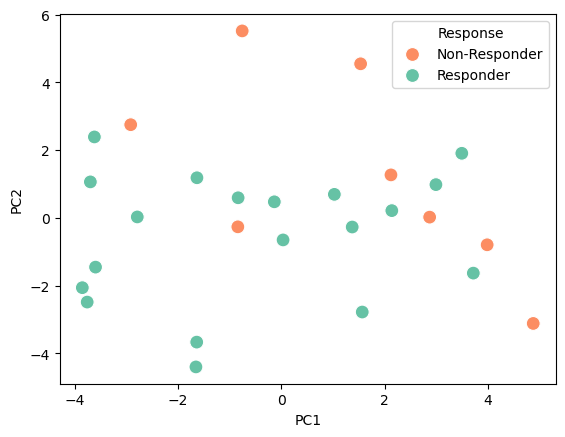

In [14]:
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(exp_matrix_avg.T)
pca_df = pd.DataFrame(pca_coords, index=exp_matrix_avg.columns, columns=["PC1", "PC2"])
pca_df["Response"] = meta["Response"]

sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="Response",
    palette=response_palette,
    s=100
)

<h1><b>High Tumour Analysis

In [20]:
ht_DEG = run_DEG_wilcoxon(
    adata=adata_hightumour,
    response_col='Response',
    celltype_col='specific_cell_types'
)

Running DEG on each cell type...
Wilcoxon rank-sum test successful for Proliferating Melanoma!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Granulocyte!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Epithelial!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Inflammatory CAF!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Endothelial!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for CD8 T!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for M2 TAM!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Classical CAF!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Plasmablast!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Dendritic!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for M1 TAM!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for CD4 T!

/opt/anaconda3/envs/deg_env/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


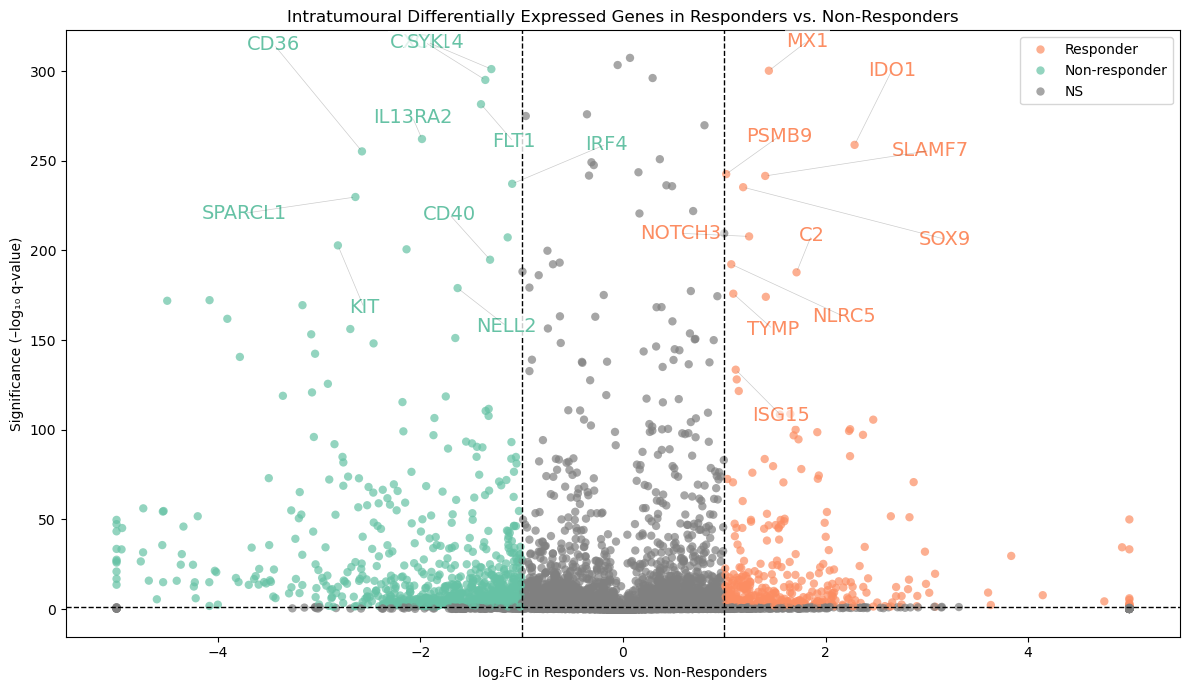

In [21]:
# first, extract q-values and lfc from dataframe:
df = ht_DEG.copy()

# set thresholds
q_max = 0.05            # q-value < 0.05
lfc_min = 1             # lfc < 1

df['-log10(qval)'] = -np.log10(df['qval'])  # -log10(q) so a smaller (more significant) q-values have points higher on the y-axis

def label(row):
    if row['qval'] < q_max and row['log2fc'] > lfc_min:
        return 'Responder'
    elif row['qval'] < q_max and row['log2fc'] < -lfc_min:
        return 'Non-responder'
    else:
        return 'NS'
df['enriched_in'] = df.apply(label, axis=1)

lfc_cap = 5  # cap log2FC between -5 and 5
df["log2fc_capped"] = df["log2fc"].clip(-lfc_cap, lfc_cap)

# volcano plot
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=df, x="log2fc_capped", y="-log10(qval)",
    hue="enriched_in", hue_order=["Responder", "Non-responder", "NS"],
    palette={"Responder":"#fc8d62", "Non-responder":"#66c2a5", "NS":"grey"},
    alpha=0.7, edgecolor="none"
)

# threshold lines
plt.axhline(-np.log10(q_max), color="black", linestyle="--", linewidth=1)
plt.axvline(lfc_min, color="black", linestyle="--", linewidth=1)
plt.axvline(-lfc_min, color="black", linestyle="--", linewidth=1)

# pull top 10 significant genes in responders and non-responders
top_responder = df[
    (df['enriched_in'] == "Responder") & df['-log10(qval)']
    .replace([np.inf, -np.inf], np.nan).notna()].sort_values("qval").drop_duplicates("gene").head(10)
top_nonresponder = df[
    (df['enriched_in'] == "Non-responder") & df['-log10(qval)']
    .replace([np.inf, -np.inf], np.nan).notna()].sort_values("qval").drop_duplicates("gene").head(10)

# add gene labels to top 10 significant genes
texts = []
texts.extend(
    plt.text(
        row["log2fc_capped"],
        row["-log10(qval)"],
        row["gene"],
        fontsize=14,
        color="#fc8d62",  # same color as responders
        ha='left', va='baseline',
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=1)
    )
    for _, row in top_responder.iterrows()
)
texts.extend(
    plt.text(
        row["log2fc_capped"],
        row["-log10(qval)"],
        row["gene"],
        fontsize=14,
        color="#66c2a5",  # same color as non-responders
        ha='right', va='baseline',
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="none", pad=1.5)
    )
    for _, row in top_nonresponder.iterrows()
)
# adjust labels to avoid overlaps
adjust_text(texts, 
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5, alpha=0.2),
            force_points=3.5, expand=(1.5, 3.5))

plt.xlabel("log₂FC in Responders vs. Non-Responders")
plt.ylabel("Significance (–log₁₀ q-value)")
plt.title("Intratumoural Differentially Expressed Genes in Responders vs. Non-Responders")
plt.legend()
plt.tight_layout()
plt.show()

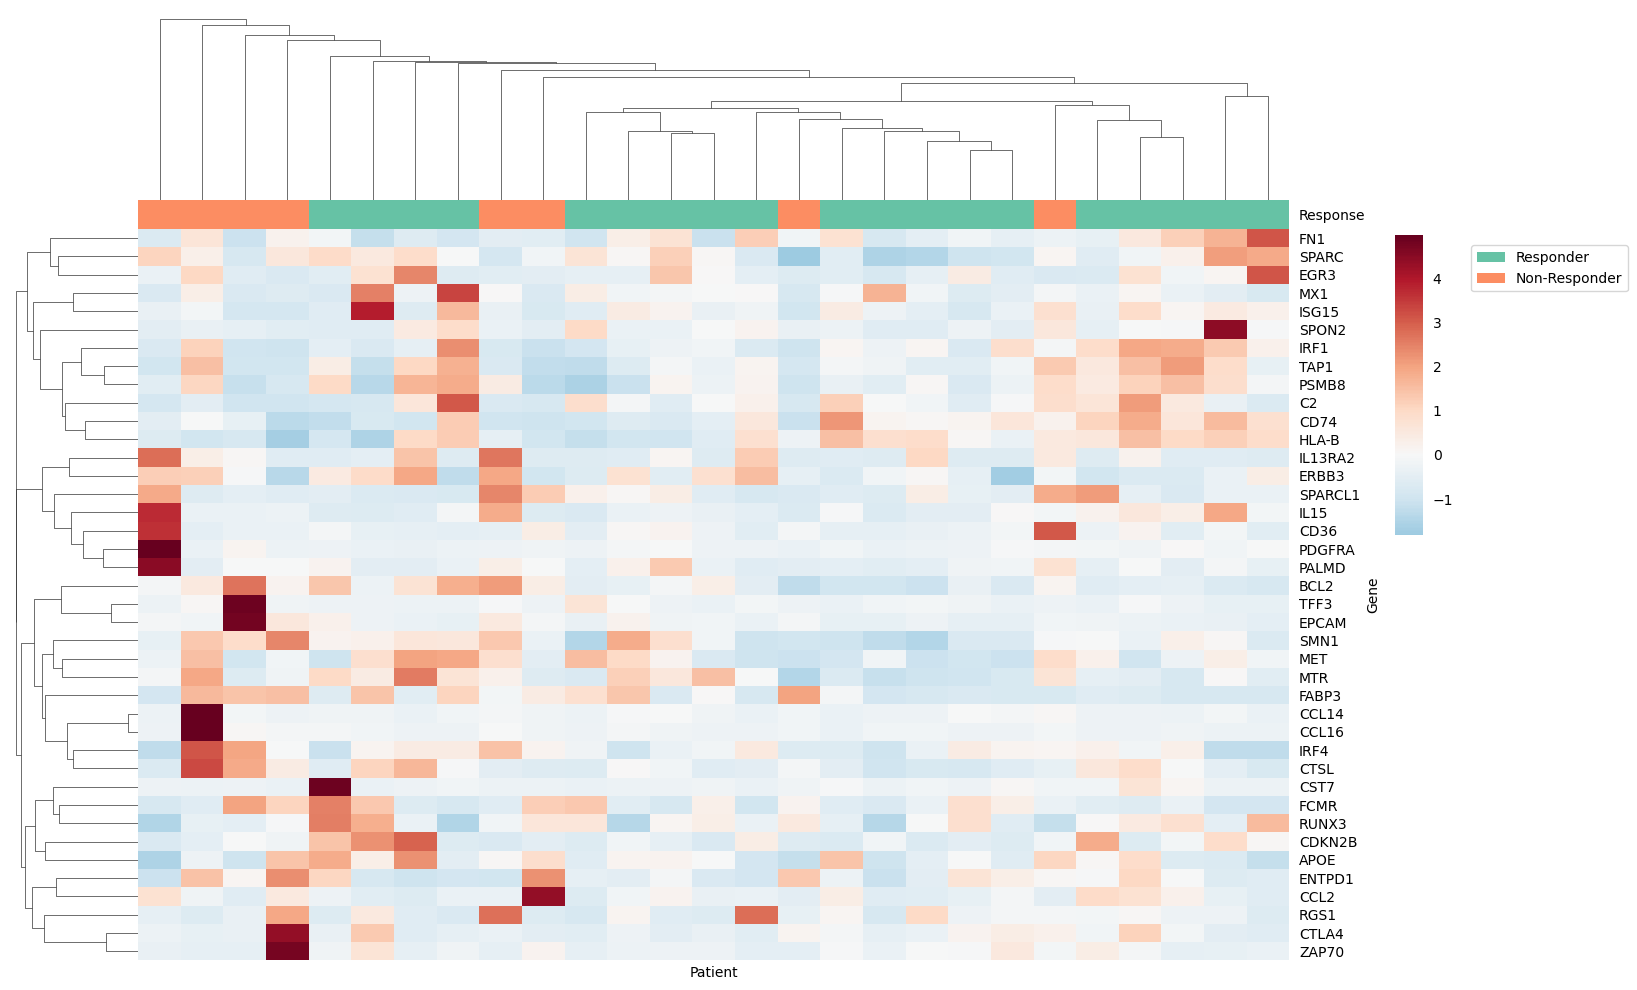

In [22]:
# top 40 genes by q-value (adjusted p-val)
ht_top_genes = ht_DEG.sort_values("qval").drop_duplicates("gene").head(40)["gene"]

# subset expression data (genes × samples)
exp_matrix = adata_filtered[:, ht_top_genes].to_df()
exp_matrix["Patient"] = adata_filtered.obs["Melpin"].values     # aggregate by patient ID
exp_matrix_avg = exp_matrix.groupby("Patient").mean().T  

# z-score transform each gene
exp_matrix_z = exp_matrix_avg.apply(
    lambda x: (x - x.mean()) / x.std(), axis=1
)

# patient metadata
meta = adata_filtered.obs.drop_duplicates("Melpin").set_index("Melpin")
meta = meta.loc[exp_matrix_avg.columns]  # align with patient order

# map the colours for plot
response_palette = {"Responder": "#66c2a5", "Non-Responder": "#fc8d62"}
col_colors = pd.DataFrame({
    "Response": meta["Response"].map(response_palette)
})

# clustered heatmap
g = sns.clustermap(
    exp_matrix_z,
    cmap="RdBu_r",
    center=0,
    col_colors=col_colors,
    figsize=(14, 10),
    xticklabels=False,
    yticklabels=True,
    dendrogram_ratio=(.1, .2),
    cbar_pos=(1.0, .46, .02, .3)
)

# add legend for response status
for label in response_palette:
    g.ax_col_dendrogram.bar(0, 0, color=response_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(
    title="", loc="right", ncol=1, bbox_to_anchor=(1.3,-.36)   # change 1,1 to move legend
)

g.tick_params(right=False) # remove tick marks on y-axis
ax = g.ax_heatmap
ax.set_ylabel('Gene')
plt.show()

<h1><b>Peritumour Analysis

In [16]:
peri_DEG = run_DEG_wilcoxon(
    adata=adata_peritumour,
    response_col='Response',
    celltype_col='specific_cell_types'
)

Running DEG on each cell type...
Wilcoxon rank-sum test successful for CD4 T!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Plasmablast!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Proliferating Melanoma!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Epithelial!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Granulocyte!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for M2 TAM!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for CD8 T!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Inflammatory CAF!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Dendritic!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Classical CAF!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Endothelial!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Mast!
R

/opt/anaconda3/envs/deg_env/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


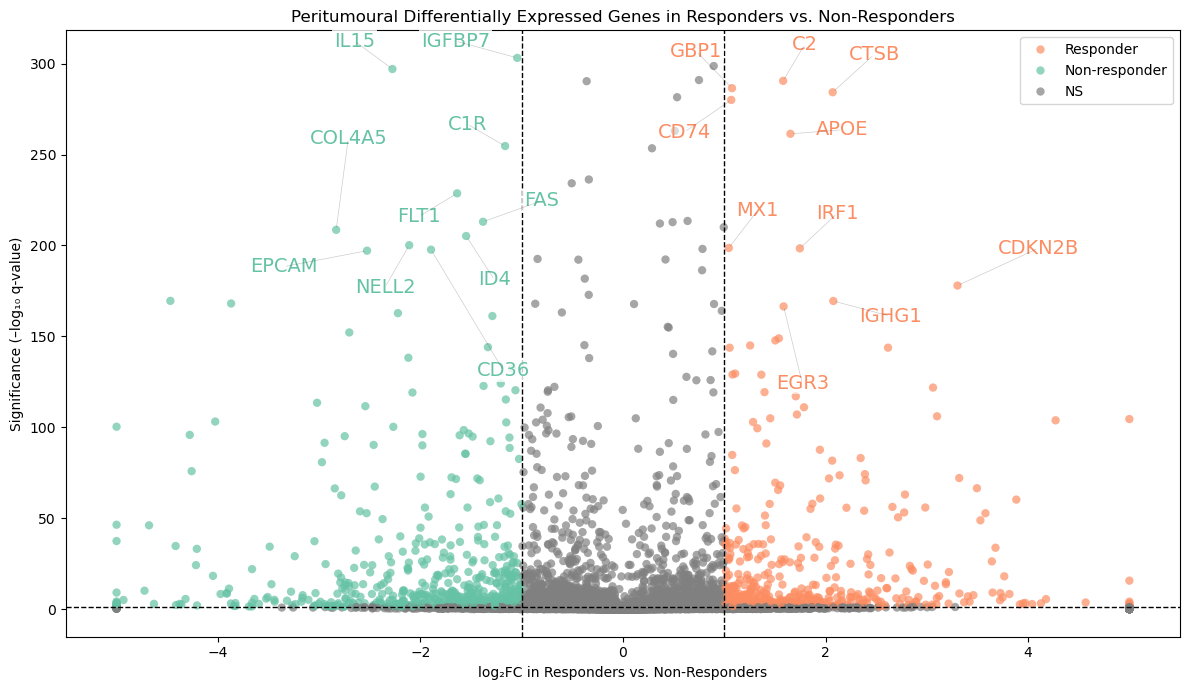

In [17]:
# first, extract q-values and lfc from dataframe:
df = peri_DEG.copy()

# set thresholds
q_max = 0.05            # q-value < 0.05
lfc_min = 1             # lfc < 1

df['-log10(qval)'] = -np.log10(df['qval'])  # -log10(q) so a smaller (more significant) q-values have points higher on the y-axis

def label(row):
    if row['qval'] < q_max and row['log2fc'] > lfc_min:
        return 'Responder'
    elif row['qval'] < q_max and row['log2fc'] < -lfc_min:
        return 'Non-responder'
    else:
        return 'NS'
df['enriched_in'] = df.apply(label, axis=1)

lfc_cap = 5  # cap log2FC between -5 and 5
df["log2fc_capped"] = df["log2fc"].clip(-lfc_cap, lfc_cap)

# volcano plot
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=df, x="log2fc_capped", y="-log10(qval)",
    hue="enriched_in", hue_order=["Responder", "Non-responder", "NS"],
    palette={"Responder":"#fc8d62", "Non-responder":"#66c2a5", "NS":"grey"},
    alpha=0.7, edgecolor="none"
)

# threshold lines
plt.axhline(-np.log10(q_max), color="black", linestyle="--", linewidth=1)
plt.axvline(lfc_min, color="black", linestyle="--", linewidth=1)
plt.axvline(-lfc_min, color="black", linestyle="--", linewidth=1)

# pull top 10 significant genes in responders and non-responders
top_responder = df[
    (df['enriched_in'] == "Responder") & df['-log10(qval)']
    .replace([np.inf, -np.inf], np.nan).notna()].sort_values("qval").drop_duplicates("gene").head(10)
top_nonresponder = df[
    (df['enriched_in'] == "Non-responder") & df['-log10(qval)']
    .replace([np.inf, -np.inf], np.nan).notna()].sort_values("qval").drop_duplicates("gene").head(10)

# add gene labels to top 10 significant genes
texts = []
texts.extend(
    plt.text(
        row["log2fc_capped"],
        row["-log10(qval)"],
        row["gene"],
        fontsize=14,
        color="#fc8d62",  # same color as responders
        ha='left', va='baseline',
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=1)
    )
    for _, row in top_responder.iterrows()
)
texts.extend(
    plt.text(
        row["log2fc_capped"],
        row["-log10(qval)"],
        row["gene"],
        fontsize=14,
        color="#66c2a5",  # same color as non-responders
        ha='right', va='baseline',
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="none", pad=1.5)
    )
    for _, row in top_nonresponder.iterrows()
)
# adjust labels to avoid overlaps
adjust_text(texts, 
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5, alpha=0.2),
            force_points=3.5, expand=(1.5, 3.5))

plt.xlabel("log₂FC in Responders vs. Non-Responders")
plt.ylabel("Significance (–log₁₀ q-value)")
plt.title("Peritumoural Differentially Expressed Genes in Responders vs. Non-Responders")
plt.legend()
plt.tight_layout()
plt.show()

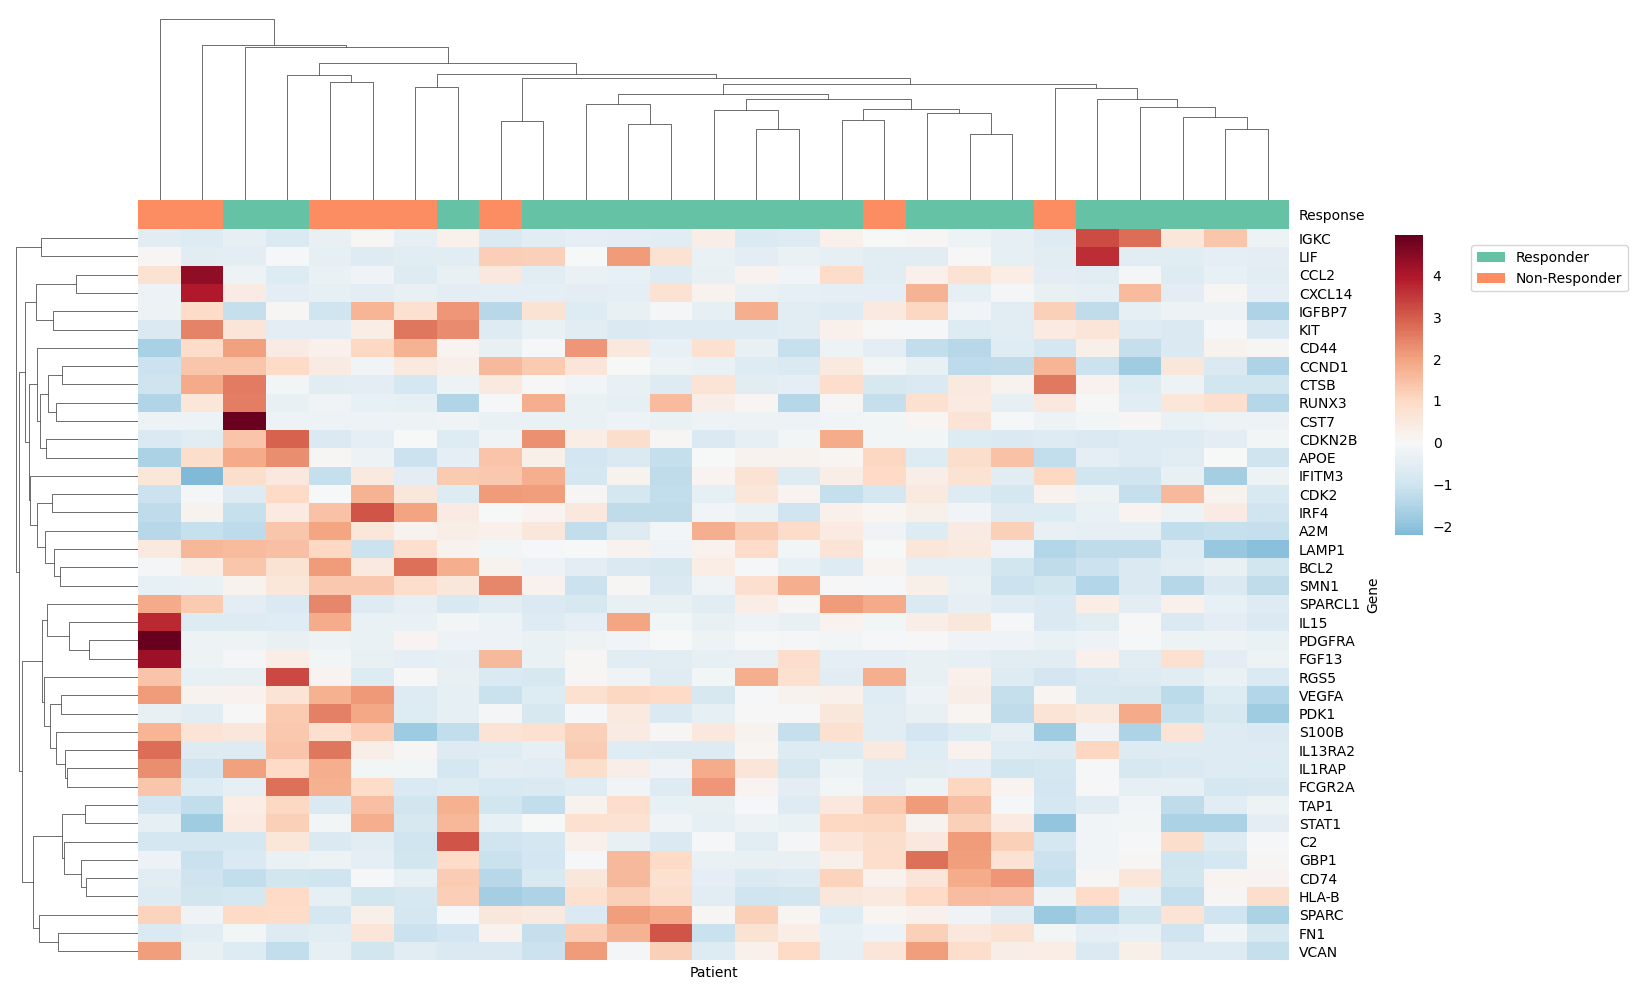

In [18]:
# top 40 genes by q-value (adjusted p-val)
peri_top_genes = peri_DEG.sort_values("qval").drop_duplicates("gene").head(40)["gene"]

# subset expression data (genes × samples)
exp_matrix = adata_filtered[:, peri_top_genes].to_df()
exp_matrix["Patient"] = adata_filtered.obs["Melpin"].values     # aggregate by patient ID
exp_matrix_avg = exp_matrix.groupby("Patient").mean().T  

# z-score transform each gene
exp_matrix_z = exp_matrix_avg.apply(
    lambda x: (x - x.mean()) / x.std(), axis=1
)

# patient metadata
meta = adata_filtered.obs.drop_duplicates("Melpin").set_index("Melpin")
meta = meta.loc[exp_matrix_avg.columns]  # align with patient order

# map the colours for plot
response_palette = {"Responder": "#66c2a5", "Non-Responder": "#fc8d62"}
col_colors = pd.DataFrame({
    "Response": meta["Response"].map(response_palette)
})

# clustered heatmap
g = sns.clustermap(
    exp_matrix_z,
    cmap="RdBu_r",
    center=0,
    col_colors=col_colors,
    figsize=(14, 10),
    xticklabels=False,
    yticklabels=True,
    dendrogram_ratio=(.1, .2),
    cbar_pos=(1.0, .46, .02, .3)
)

# add legend for response status
for label in response_palette:
    g.ax_col_dendrogram.bar(0, 0, color=response_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(
    title="", loc="right", ncol=1, bbox_to_anchor=(1.3,-.36)   # change 1,1 to move legend
)

g.tick_params(right=False) # remove tick marks on y-axis
ax = g.ax_heatmap
ax.set_ylabel('Gene')
plt.show()